In [20]:
import time
notebookstart= time.time()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
# Models Packages
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import preprocessing
from contextlib import contextmanager
import keras as ks
from keras import backend as K
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer as Tfidf
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# Tf-Idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack, csr_matrix
from nltk.corpus import stopwords 
from scipy.cluster.vq import kmeans2, whiten
from sklearn.decomposition import PCA
# Viz

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.layers import Input, Dropout, Dense, Embedding, SpatialDropout1D, concatenate


from numpy.random import seed
seed(666)
from tensorflow import set_random_seed
set_random_seed(666)

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print('[{' + name + '}] done in {' + str(round(time.time() - t0, 3)) + '} s')
    


Using TensorFlow backend.


In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15

import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn import metrics
from sklearn import linear_model
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.display import HTML
import json
import altair as alt

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
train = reduce_mem_usage(pd.read_csv('input/train.csv.zip'))
test = reduce_mem_usage(pd.read_csv('input/test.csv.zip'))
mulliken = reduce_mem_usage(pd.read_csv('input/mulliken_charges.csv.zip'))
dipole = reduce_mem_usage(pd.read_csv('input/dipole_moments.csv.zip'))
structure = reduce_mem_usage(pd.read_csv('input/structures.csv.zip'))
potential = reduce_mem_usage(pd.read_csv('input/potential_energy.csv.zip'))
magnetic = reduce_mem_usage(pd.read_csv('input/magnetic_shielding_tensors.csv.zip'))
scaler = reduce_mem_usage(pd.read_csv('input/scalar_coupling_contributions.csv.zip'))
sub = reduce_mem_usage(pd.read_csv('input/sample_submission.csv.zip'))


Mem. usage decreased to 106.62 Mb (50.0% reduction)
Mem. usage decreased to 52.57 Mb (45.0% reduction)
Mem. usage decreased to 16.09 Mb (54.2% reduction)
Mem. usage decreased to  1.13 Mb (56.2% reduction)
Mem. usage decreased to 51.74 Mb (52.1% reduction)
Mem. usage decreased to  0.81 Mb (37.5% reduction)
Mem. usage decreased to 39.49 Mb (69.3% reduction)
Mem. usage decreased to 115.50 Mb (59.4% reduction)
Mem. usage decreased to 11.95 Mb (68.7% reduction)


In [4]:
train.head(10)

id     molecule_name  atom_index_0  atom_index_1  type  \
0   0  dsgdb9nsd_000001             1             0  1JHC   
1   1  dsgdb9nsd_000001             1             2  2JHH   
2   2  dsgdb9nsd_000001             1             3  2JHH   
3   3  dsgdb9nsd_000001             1             4  2JHH   
4   4  dsgdb9nsd_000001             2             0  1JHC   
5   5  dsgdb9nsd_000001             2             3  2JHH   
6   6  dsgdb9nsd_000001             2             4  2JHH   
7   7  dsgdb9nsd_000001             3             0  1JHC   
8   8  dsgdb9nsd_000001             3             4  2JHH   
9   9  dsgdb9nsd_000001             4             0  1JHC   

   scalar_coupling_constant  
0                84.8125000  
1               -11.2578125  
2               -11.2578125  
3               -11.2578125  
4                84.8125000  
5               -11.2578125  
6               -11.2578125  
7                84.8125000  
8               -11.2578125  
9                84.8125000

In [5]:
structure.head(10)

molecule_name  atom_index atom                  x                  y  \
0  dsgdb9nsd_000001           0    C -0.012695312500000  1.085937500000000   
1  dsgdb9nsd_000001           1    H  0.002149581909180 -0.006031036376953   
2  dsgdb9nsd_000001           2    H  1.011718750000000  1.463867187500000   
3  dsgdb9nsd_000001           3    H -0.541015625000000  1.447265625000000   
4  dsgdb9nsd_000001           4    H -0.523925781250000  1.437500000000000   
5  dsgdb9nsd_000002           0    N -0.040435791015625  1.024414062500000   
6  dsgdb9nsd_000002           1    H  0.017257690429688  0.012542724609375   
7  dsgdb9nsd_000002           2    H  0.916015625000000  1.358398437500000   
8  dsgdb9nsd_000002           3    H -0.520507812500000  1.343750000000000   
9  dsgdb9nsd_000003           0    O -0.034362792968750  0.977539062500000   

                   z  
0  0.008003234863281  
1  0.001976013183594  
2  0.000276565551758  
3 -0.876464843750000  
4  0.906250000000000  
5  0.062561035156250  
6 -0.027374267578125  
7 -0.028762817382812  
8 -0.775390625000000  
9  0.007602691650391

In [6]:
def map_atom_info(df, atom_idx):
    df = pd.merge(df, structure, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    
    df = df.drop('atom_index', axis=1)
    df = df.rename(columns={'atom': f'atom_{atom_idx}',
                            'x': f'x_{atom_idx}',
                            'y': f'y_{atom_idx}',
                            'z': f'z_{atom_idx}'})
    return df

train = map_atom_info(train, 0)
train = map_atom_info(train, 1)

test = map_atom_info(test, 0)
test = map_atom_info(test, 1)

In [7]:
train_p_0 = train[['x_0', 'y_0', 'z_0']].values
train_p_1 = train[['x_1', 'y_1', 'z_1']].values
test_p_0 = test[['x_0', 'y_0', 'z_0']].values
test_p_1 = test[['x_1', 'y_1', 'z_1']].values

In [8]:
train['dist'] = np.linalg.norm(train_p_0 - train_p_1, axis=1)
test['dist'] = np.linalg.norm(test_p_0 - test_p_1, axis=1)


In [9]:
train['dist_0'] = np.linalg.norm(train_p_0 + train_p_1, axis=1)
test['dist_0'] = np.linalg.norm(test_p_0 + test_p_1, axis=1)

train['dist_1'] = np.max(train_p_0 * train_p_1, axis=1)
test['dist_1'] = np.max(test_p_0 * test_p_1, axis=1)

train['dist_2'] = np.min(train_p_0 * train_p_1, axis=1)
test['dist_2'] = np.min(test_p_0 * test_p_1, axis=1)

train['dist_3'] = np.var(train_p_0 * train_p_1, axis=1)
test['dist_3'] = np.var(test_p_0 * test_p_1, axis=1)

In [10]:
train['c_0'] = train.groupby('molecule_name')['id'].transform('count')
test['c_0'] = test.groupby('molecule_name')['id'].transform('count')

train['c_1'] = train.groupby(['molecule_name', 'atom_index_0'])['id'].transform('count')
test['c_1'] = test.groupby(['molecule_name', 'atom_index_0'])['id'].transform('count')

train['c_2'] = train.groupby(['molecule_name', 'atom_index_1'])['id'].transform('count')
test['c_2'] = test.groupby(['molecule_name', 'atom_index_1'])['id'].transform('count')

train['c_3'] = train['c_2'] / train['c_1']
test['c_3'] = test['c_2'] / test['c_1']

train['m_0'] = train.groupby(['molecule_name', 'atom_index_0'])['dist_2'].transform('max')
test['m_0'] = train.groupby(['molecule_name', 'atom_index_0'])['dist_2'].transform('max')

train['d_0'] = np.max(np.abs(train_p_0 - train_p_1), axis=1)
test['d_0'] = np.max(np.abs(test_p_0 - test_p_1), axis=1)


In [11]:
train['ct_0'] = train.groupby(['molecule_name', 'atom_index_1', 'type'])['id'].transform('count')
test['ct_0'] = test.groupby(['molecule_name', 'atom_index_1', 'type'])['id'].transform('count')

train['ct_1'] = train.groupby(['molecule_name', 'atom_index_0', 'type'])['id'].transform('count')
test['ct_1'] = test.groupby(['molecule_name', 'atom_index_0', 'type'])['id'].transform('count')

train['ct_2'] = train.groupby(['molecule_name', 'type'])['id'].transform('count')
test['ct_2'] = test.groupby(['molecule_name', 'type'])['id'].transform('count')


In [12]:
train = train.merge(potential, on=['molecule_name'], how='left')
test = test.merge(potential, on=['molecule_name'], how='left')

In [14]:
y = train['scalar_coupling_constant']

In [15]:
np.unique(train['type'])

array(['1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'],
      dtype=object)

In [16]:
def metric(df, preds):
    df["prediction"] = preds
    maes = []
    for t in df.type.unique():
        y_true = df[df.type==t].scalar_coupling_constant.values
        y_pred = df[df.type==t].prediction.values
        mae = np.log(metrics.mean_absolute_error(y_true, y_pred))
        maes.append(mae)
    return np.mean(maes)
#df for evaluate
eval_df = pd.DataFrame({"type": train["type"]})
eval_df["scalar_coupling_constant"] = y

In [17]:
train.head()

id     molecule_name  atom_index_0  atom_index_1  type  \
0   0  dsgdb9nsd_000001             1             0  1JHC   
1   1  dsgdb9nsd_000001             1             2  2JHH   
2   2  dsgdb9nsd_000001             1             3  2JHH   
3   3  dsgdb9nsd_000001             1             4  2JHH   
4   4  dsgdb9nsd_000001             2             0  1JHC   

   scalar_coupling_constant atom_0               x_0                y_0  \
0                84.8125000      H  0.00214958190918 -0.006031036376953   
1               -11.2578125      H  0.00214958190918 -0.006031036376953   
2               -11.2578125      H  0.00214958190918 -0.006031036376953   
3               -11.2578125      H  0.00214958190918 -0.006031036376953   
4                84.8125000      H  1.01171875000000  1.463867187500000   

                 z_0        ...        c_0  c_1  c_2                c_3  \
0  0.001976013183594        ...         10    4    4  1.000000000000000   
1  0.001976013183594        ...         10    4    1  0.250000000000000   
2  0.001976013183594        ...         10    4    2  0.500000000000000   
3  0.001976013183594        ...         10    4    3  0.750000000000000   
4  0.000276565551758        ...         10    3    4  1.333333333333333   

                 m_0           d_0  ct_0  ct_1  ct_2  potential_energy  
0 -0.006549835205078  1.0917968750     4     1     4         -40.53125  
1 -0.006549835205078  1.4697265625     1     3     6         -40.53125  
2 -0.006549835205078  1.4531250000     2     3     6         -40.53125  
3 -0.006549835205078  1.4433593750     3     3     6         -40.53125  
4 -0.012847900390625  1.0244140625     4     1     4         -40.53125  

[5 rows x 29 columns]

In [18]:
train.shape

(4658147, 29)

In [27]:
from sklearn.preprocessing import StandardScaler

In [46]:
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
n_split = 5
kf = KFold(n_splits=n_split, random_state=666, shuffle=True)
    
for type_ in np.unique(train['type']):

    
    train_ = train[train['type'] == type_]
    test_ = test[test['type'] == type_]
    
    train_index = train_.index
    test_index = test_.index
    
    y_ = y[train['type'] == type_]
    
    features = [c for c in train_.columns if c not in ['id', 'molecule_name', 'x_0', 'y_0', 'z_0',
                                                       'x_1', 'y_1', 'z_1', 'atom_index',
                                                       'type', 'scalar_coupling_constant',
                                                       'atom_0', 'atom_1']]
    scaler = StandardScaler()
    scaler.fit(pd.concat([train_[features], test_[features]]))
    x_tr = pd.DataFrame(scaler.transform(train_[features]))
    x_te = pd.DataFrame(scaler.transform(test_[features]))
                
    
    
    for i, (train_idx, valid_idx) in enumerate(kf.split(train_)):  
        print(f'Fold {i + 1}')
        x_train = x_tr
        y_train = y_
        
        config = tf.ConfigProto(intra_op_parallelism_threads=3,
                            use_per_session_threads=3, inter_op_parallelism_threads=3)
        with tf.Session(graph=tf.Graph(), config=config) as sess, timer('fit_predict'):
                ks.backend.set_session(sess)
                with tf.device('/gpu:0'):
                        model_in = ks.Input(shape=(x_train.shape[1],), dtype='float32', sparse=False)
                        out = ks.layers.Dense(2**10, activation='relu', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(model_in)
                        out = ks.layers.BatchNormalization()(out)
                        out = ks.layers.Dropout(0.5)(out)
                        out = ks.layers.Dense(2**9, activation='sigmoid', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(out)
                        out = ks.layers.BatchNormalization()(out)
                        out = ks.layers.Dropout(0.2)(out)
                        out = ks.layers.Dense(2**7, activation='relu', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(out)
                        out = ks.layers.BatchNormalization()(out)
                        out = ks.layers.Dropout(0.2)(out)
                        out =  ks.layers.Dense(2**6, activation='relu', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(out)
                        out = ks.layers.Dense(1 , activation='linear', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.05, seed=666))(out)
                        model = ks.models.Model(model_in, out)
                        model.compile(loss='mean_absolute_error',
                                      optimizer=ks.optimizers.Adam(lr=2e-3),
                                      metrics=['mean_absolute_error'])
                        batch_size = 2 ** 8
                        for i in range(4):
                            with timer('pass ' +  str(i + 1)):
                                model.fit(x=x_train.iloc[train_idx], y=y_train.iloc[train_idx], batch_size=batch_size+(batch_size*(2*i)), epochs=2, 
                                    validation_data=(x_train.iloc[valid_idx], y_train.iloc[valid_idx]), callbacks=[], shuffle=True)
        
                        oof[train_index[valid_idx]] = model.predict(x_train.iloc[valid_idx]).reshape(1, -1)
                        predictions[test_index] += model.predict(x_te)[:, 0] / n_split

    
print("CV score: {:<8.5f}".format(metric(eval_df, oof)))

Fold 1
Train on 567532 samples, validate on 141884 samples
Epoch 1/2
567532/567532 [==============================] - 9s 17us/step - loss: 9.2390 - mean_absolute_error: 9.2390 - val_loss: 3.9621 - val_mean_absolute_error: 3.9621
Epoch 2/2
567532/567532 [==============================] - 9s 16us/step - loss: 6.0073 - mean_absolute_error: 6.0073 - val_loss: 3.8223 - val_mean_absolute_error: 3.8223
[{pass 1}] done in {19.135} s
Train on 567532 samples, validate on 141884 samples
Epoch 1/2
567532/567532 [==============================] - 3s 6us/step - loss: 5.2864 - mean_absolute_error: 5.2864 - val_loss: 3.6075 - val_mean_absolute_error: 3.6075
Epoch 2/2
567532/567532 [==============================] - 3s 6us/step - loss: 5.0366 - mean_absolute_error: 5.0366 - val_loss: 3.7017 - val_mean_absolute_error: 3.7017
[{pass 2}] done in {6.644} s
Train on 567532 samples, validate on 141884 samples
Epoch 1/2
567532/567532 [==============================] - 2s 4us/step - loss: 4.7621 - mean_absolut

567533/567533 [==============================] - 2s 3us/step - loss: 4.5278 - mean_absolute_error: 4.5278 - val_loss: 3.4511 - val_mean_absolute_error: 3.4511
Epoch 2/2
567533/567533 [==============================] - 2s 3us/step - loss: 4.3857 - mean_absolute_error: 4.3857 - val_loss: 3.4641 - val_mean_absolute_error: 3.4641
[{pass 4}] done in {3.702} s
[{fit_predict}] done in {44.494} s
Fold 1


Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7fbd2027bba8>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.


Train on 34690 samples, validate on 8673 samples
Epoch 1/2
34690/34690 [==============================] - 1s 33us/step - loss: 16.5919 - mean_absolute_error: 16.5919 - val_loss: 5.4244 - val_mean_absolute_error: 5.4244
Epoch 2/2
34690/34690 [==============================] - 1s 16us/step - loss: 4.4079 - mean_absolute_error: 4.4079 - val_loss: 3.1339 - val_mean_absolute_error: 3.1339
[{pass 1}] done in {2.349} s
Train on 34690 samples, validate on 8673 samples
Epoch 1/2
34690/34690 [==============================] - 0s 6us/step - loss: 3.7380 - mean_absolute_error: 3.7380 - val_loss: 3.0648 - val_mean_absolute_error: 3.0648
Epoch 2/2
34690/34690 [==============================] - 0s 6us/step - loss: 3.6211 - mean_absolute_error: 3.6211 - val_loss: 2.4640 - val_mean_absolute_error: 2.4640
[{pass 2}] done in {0.409} s
Train on 34690 samples, validate on 8673 samples
Epoch 1/2
34690/34690 [==============================] - 0s 4us/step - loss: 3.4169 - mean_absolute_error: 3.4169 - val_los

Epoch 2/2
34691/34691 [==============================] - 0s 3us/step - loss: 3.2888 - mean_absolute_error: 3.2888 - val_loss: 2.3660 - val_mean_absolute_error: 2.3660
[{pass 4}] done in {0.226} s
[{fit_predict}] done in {4.257} s
Fold 1
Train on 912539 samples, validate on 228135 samples
Epoch 1/2
912539/912539 [==============================] - 15s 16us/step - loss: 2.0109 - mean_absolute_error: 2.0109 - val_loss: 1.8331 - val_mean_absolute_error: 1.8331
Epoch 2/2
912539/912539 [==============================] - 14s 16us/step - loss: 1.8844 - mean_absolute_error: 1.8844 - val_loss: 1.7701 - val_mean_absolute_error: 1.7701
[{pass 1}] done in {30.103} s
Train on 912539 samples, validate on 228135 samples
Epoch 1/2
912539/912539 [==============================] - 5s 6us/step - loss: 1.7999 - mean_absolute_error: 1.7999 - val_loss: 1.7048 - val_mean_absolute_error: 1.7048
Epoch 2/2
912539/912539 [==============================] - 5s 6us/step - loss: 1.7758 - mean_absolute_error: 1.7758 - 

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7fb9bfc82a58>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.
Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7fb9bfc64da0>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/

Train on 912540 samples, validate on 228134 samples
Epoch 1/2
912540/912540 [==============================] - 15s 16us/step - loss: 2.0128 - mean_absolute_error: 2.0128 - val_loss: 1.8298 - val_mean_absolute_error: 1.8298
Epoch 2/2
912540/912540 [==============================] - 14s 16us/step - loss: 1.8865 - mean_absolute_error: 1.8865 - val_loss: 1.7715 - val_mean_absolute_error: 1.7715
[{pass 1}] done in {30.431} s
Train on 912540 samples, validate on 228134 samples
Epoch 1/2
912540/912540 [==============================] - 5s 6us/step - loss: 1.8009 - mean_absolute_error: 1.8009 - val_loss: 1.7005 - val_mean_absolute_error: 1.7005
Epoch 2/2
912540/912540 [==============================] - 5s 6us/step - loss: 1.7768 - mean_absolute_error: 1.7768 - val_loss: 1.6759 - val_mean_absolute_error: 1.6759
[{pass 2}] done in {10.598} s
Train on 912540 samples, validate on 228134 samples
Epoch 1/2
912540/912540 [==============================] - 4s 4us/step - loss: 1.7474 - mean_absolute_er

302429/302429 [==============================] - 1s 3us/step - loss: 0.8189 - mean_absolute_error: 0.8189 - val_loss: 0.7617 - val_mean_absolute_error: 0.7617
Epoch 2/2
302429/302429 [==============================] - 1s 3us/step - loss: 0.8101 - mean_absolute_error: 0.8101 - val_loss: 0.7510 - val_mean_absolute_error: 0.7510
[{pass 4}] done in {1.944} s
[{fit_predict}] done in {24.198} s
Fold 5
Train on 302429 samples, validate on 75607 samples
Epoch 1/2
302429/302429 [==============================] - 5s 18us/step - loss: 1.3848 - mean_absolute_error: 1.3848 - val_loss: 0.8786 - val_mean_absolute_error: 0.8786
Epoch 2/2
302429/302429 [==============================] - 5s 16us/step - loss: 1.0289 - mean_absolute_error: 1.0289 - val_loss: 0.8763 - val_mean_absolute_error: 0.8763
[{pass 1}] done in {10.79} s
Train on 302429 samples, validate on 75607 samples
Epoch 1/2
302429/302429 [==============================] - 2s 6us/step - loss: 0.9198 - mean_absolute_error: 0.9198 - val_loss: 0.

Epoch 2/2
95403/95403 [==============================] - 0s 4us/step - loss: 1.2692 - mean_absolute_error: 1.2692 - val_loss: 1.1568 - val_mean_absolute_error: 1.1568
[{pass 3}] done in {0.774} s
Train on 95403 samples, validate on 23850 samples
Epoch 1/2
95403/95403 [==============================] - 0s 3us/step - loss: 1.2475 - mean_absolute_error: 1.2475 - val_loss: 1.1347 - val_mean_absolute_error: 1.1347
Epoch 2/2
95403/95403 [==============================] - 0s 3us/step - loss: 1.2243 - mean_absolute_error: 1.2243 - val_loss: 1.1173 - val_mean_absolute_error: 1.1173
[{pass 4}] done in {0.627} s
[{fit_predict}] done in {8.853} s
Fold 5
Train on 95403 samples, validate on 23850 samples
Epoch 1/2
95403/95403 [==============================] - 2s 22us/step - loss: 1.8441 - mean_absolute_error: 1.8441 - val_loss: 1.4692 - val_mean_absolute_error: 1.4692
Epoch 2/2
95403/95403 [==============================] - 1s 16us/step - loss: 1.5155 - mean_absolute_error: 1.5155 - val_loss: 1.346

Epoch 2/2
1208303/1208303 [==============================] - 7s 6us/step - loss: 1.6216 - mean_absolute_error: 1.6216 - val_loss: 1.5411 - val_mean_absolute_error: 1.5411
[{pass 2}] done in {14.072} s
Train on 1208303 samples, validate on 302076 samples
Epoch 1/2
1208303/1208303 [==============================] - 5s 4us/step - loss: 1.5965 - mean_absolute_error: 1.5965 - val_loss: 1.5131 - val_mean_absolute_error: 1.5131
Epoch 2/2
1208303/1208303 [==============================] - 5s 4us/step - loss: 1.5868 - mean_absolute_error: 1.5868 - val_loss: 1.5006 - val_mean_absolute_error: 1.5006
[{pass 3}] done in {9.64} s
Train on 1208303 samples, validate on 302076 samples
Epoch 1/2
1208303/1208303 [==============================] - 4s 3us/step - loss: 1.5717 - mean_absolute_error: 1.5717 - val_loss: 1.4859 - val_mean_absolute_error: 1.4859
Epoch 2/2
1208303/1208303 [==============================] - 4s 3us/step - loss: 1.5641 - mean_absolute_error: 1.5641 - val_loss: 1.4795 - val_mean_abso

Epoch 2/2
472489/472489 [==============================] - 7s 16us/step - loss: 1.3474 - mean_absolute_error: 1.3474 - val_loss: 1.1600 - val_mean_absolute_error: 1.1600
[{pass 1}] done in {16.104} s
Train on 472489 samples, validate on 118122 samples
Epoch 1/2
472489/472489 [==============================] - 3s 6us/step - loss: 1.2225 - mean_absolute_error: 1.2225 - val_loss: 1.0905 - val_mean_absolute_error: 1.0905
Epoch 2/2
472489/472489 [==============================] - 3s 6us/step - loss: 1.1878 - mean_absolute_error: 1.1878 - val_loss: 1.0546 - val_mean_absolute_error: 1.0546
[{pass 2}] done in {5.429} s
Train on 472489 samples, validate on 118122 samples
Epoch 1/2
472489/472489 [==============================] - 2s 4us/step - loss: 1.1479 - mean_absolute_error: 1.1479 - val_loss: 1.0256 - val_mean_absolute_error: 1.0256
Epoch 2/2
472489/472489 [==============================] - 2s 4us/step - loss: 1.1253 - mean_absolute_error: 1.1253 - val_loss: 1.0012 - val_mean_absolute_error

133132/133132 [==============================] - 0s 3us/step - loss: 0.6208 - mean_absolute_error: 0.6208 - val_loss: 0.5977 - val_mean_absolute_error: 0.5977
[{pass 4}] done in {0.853} s
[{fit_predict}] done in {11.621} s
Fold 4
Train on 133132 samples, validate on 33283 samples
Epoch 1/2
133132/133132 [==============================] - 3s 20us/step - loss: 0.7524 - mean_absolute_error: 0.7524 - val_loss: 0.6859 - val_mean_absolute_error: 0.6859
Epoch 2/2
133132/133132 [==============================] - 2s 16us/step - loss: 0.6950 - mean_absolute_error: 0.6950 - val_loss: 0.6584 - val_mean_absolute_error: 0.6584
[{pass 1}] done in {5.478} s
Train on 133132 samples, validate on 33283 samples
Epoch 1/2
133132/133132 [==============================] - 1s 6us/step - loss: 0.6648 - mean_absolute_error: 0.6648 - val_loss: 0.6301 - val_mean_absolute_error: 0.6301
Epoch 2/2
133132/133132 [==============================] - 1s 6us/step - loss: 0.6482 - mean_absolute_error: 0.6482 - val_loss: 0.

In [47]:
predictions

array([-1.12314841, 88.75858498,  0.18959527, ...,  3.40834314,
       -1.12314841, 88.75858307])

In [52]:
test.shape

(2505542, 28)

In [53]:
sub = pd.read_csv('input/sample_submission.csv.zip')

In [54]:
sub.head()

id  scalar_coupling_constant
0  4658147                         0
1  4658148                         0
2  4658149                         0
3  4658150                         0
4  4658151                         0

In [55]:
sub.shape

(2505542, 2)

In [56]:
len(predictions)

2505542

In [58]:
sub['scalar_coupling_constant'] = predictions

sub.to_csv("submission-nn-v0.1.0.csv", index=False)

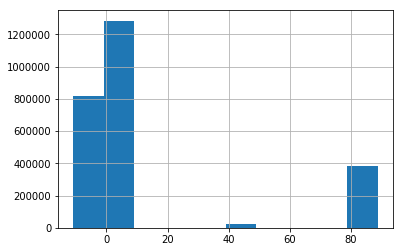

In [59]:
sub['scalar_coupling_constant'].hist()

In [60]:
pd.DataFrame(oof).to_csv('oofs/validation_nn_v0.1.0.csv', index=False)
pd.DataFrame(predictions).to_csv('oofs/test_nn_v0.1.0.csv', index=False)